### Домашнее задание

1. Самостоятельно разобраться с тем, что такое tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html и еще - https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог с помощью precision_recall_curve, как это делалось на уроке)
3. Повторить п.2, но используя уже не медиану, а max
4. (опциональное, если очень хочется) Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (подсказка: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал). Подсказка 2 - нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 3 разных метода получения эмбедингов пользователей: mean, median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

#### Ссылки

1. http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf
2. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

#### Библиотеки, которые нужно установить:

1. gensim
2. razdel
3. pymorphy2
4. nltk

**2** Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог с помощью precision_recall_curve, как это делалось на уроке)
Повторить п.2, но используя уже не медиану, а max

In [ ]:
#вариант с median
def get_user_embedding(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.median(user_vector, 0)
    return user_vector

In [ ]:
get_user_embedding(user_articles_list)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01249175, 0.        , 0.01256949, 0.09427064,
       0.        , 0.        , 0.        , 0.04221687, 0.03310001,
       0.14247551, 0.        , 0.01213228, 0.        , 0.        ,
       0.        , 0.        , 0.02100431, 0.        , 0.        ])

Интересовался новостями с топиками topic_3, topic_14

In [ ]:
users['articles'].iloc[33]

'[323329, 321961, 324743, 323186, 324632, 474690]'

In [ ]:
" ".join(news[news['doc_id']==323186]['title'].iloc[0])

'глава российский мид сергей лавров опровергнуть появиться сми информация якобы готовиться обмен декларация россия сша сотрудничество сфера риа новость nn читать сообщение разговаривать автор сообщение откуда автор источник какихлибо основание подобный род репортаж откуда информация появиться журналист итог встреча госсекретарь сша джон керри nn позиция изложить декларация напринимать достаточно рамка обсе рамка совет россия нато высокий уровень продекларировать всё обеспечивать неделимость безопасность никто обеспечивать безопасность счёт безопасность продолжить министр лавров москва система нато создавать проблема безопасность поэтому декларация недостаточно договариваться совместный система россия предлагать начинать путин посещать сша нужно вести речь очередной декларация гарантия проверять объективный военнотехнический критерий гарантия ненаправленность система против российский ядерный потенциал подчеркнуть глава мид газета коммерсантъ ссылаться дипломатический источник написать 

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [ ]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,u105138,0.0,0.0,0.000000,0.000000,0.000000,0.026570,0.000000,0.033578,0.000000,...,0.000000,0.000000,0.011554,0.025922,0.016846,0.000000,0.0,0.021003,0.000000,0.00000
1,u108690,0.0,0.0,0.006052,0.017382,0.017756,0.000000,0.042592,0.010434,0.072047,...,0.008526,0.000000,0.011245,0.000000,0.000000,0.039027,0.0,0.027840,0.078209,0.02932
2,u108339,0.0,0.0,0.000000,0.032090,0.015849,0.012489,0.131570,0.008137,0.078862,...,0.000000,0.024178,0.000000,0.037257,0.000000,0.012616,0.0,0.000000,0.022288,0.00000


Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [ ]:
target = pd.read_csv("./drive/MyDrive/users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [ ]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,churn
0,u105138,0.0,0.0,0.000000,0.000000,0.000000,0.026570,0.000000,0.033578,0.000000,...,0.000000,0.011554,0.025922,0.016846,0.000000,0.0,0.021003,0.000000,0.00000,0
1,u108690,0.0,0.0,0.006052,0.017382,0.017756,0.000000,0.042592,0.010434,0.072047,...,0.000000,0.011245,0.000000,0.000000,0.039027,0.0,0.027840,0.078209,0.02932,1
2,u108339,0.0,0.0,0.000000,0.032090,0.015849,0.012489,0.131570,0.008137,0.078862,...,0.024178,0.000000,0.037257,0.000000,0.012616,0.0,0.000000,0.022288,0.00000,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(25)]], 
                                                    X['churn'], random_state=0)

In [ ]:
logreg = LogisticRegression()
#обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.11948963, 0.04683932, 0.25778692, 0.34146488, 0.04244245,
       0.07150584, 0.10400926, 0.04275291, 0.12242144, 0.17195111])

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

### Рассчитаем Precision, Recall, F_score

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.216642, F-Score=0.723, Precision=0.643, Recall=0.824


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1643  112]
 [  44  201]]


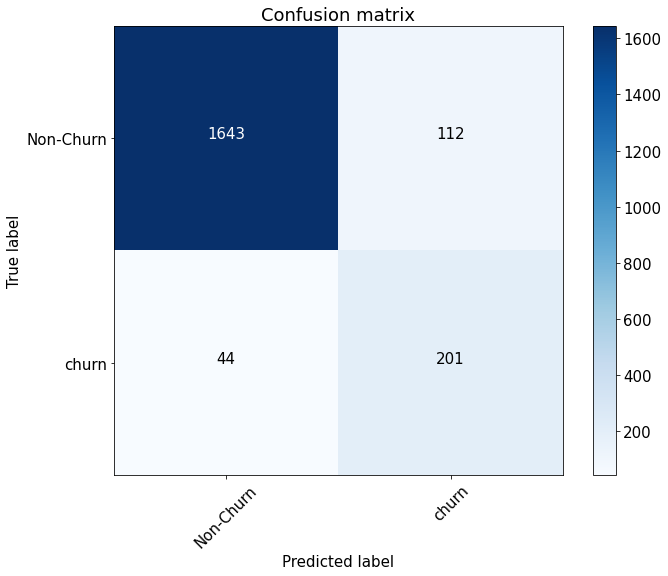

In [ ]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
roc_auc_score(y_test, preds)

0.9564602593174021

In [ ]:
#вариант с max
def get_user_embedding(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.max(user_vector, 0)
    return user_vector

In [ ]:
get_user_embedding(user_articles_list)

array([0.01115682, 0.02772529, 0.01530802, 0.0129403 , 0.06724957,
       0.28425887, 0.21591331, 0.02300769, 0.27316764, 0.35782465,
       0.04879408, 0.01360132, 0.03044837, 0.31296191, 0.23272154,
       0.32187146, 0.30040556, 0.16303335, 0.19325298, 0.21485974,
       0.05553982, 0.        , 0.17933431, 0.09051151, 0.        ])

In [ ]:
users['articles'].iloc[33]

'[323329, 321961, 324743, 323186, 324632, 474690]'

In [ ]:
" ".join(news[news['doc_id']==323186]['title'].iloc[0])

'глава российский мид сергей лавров опровергнуть появиться сми информация якобы готовиться обмен декларация россия сша сотрудничество сфера риа новость nn читать сообщение разговаривать автор сообщение откуда автор источник какихлибо основание подобный род репортаж откуда информация появиться журналист итог встреча госсекретарь сша джон керри nn позиция изложить декларация напринимать достаточно рамка обсе рамка совет россия нато высокий уровень продекларировать всё обеспечивать неделимость безопасность никто обеспечивать безопасность счёт безопасность продолжить министр лавров москва система нато создавать проблема безопасность поэтому декларация недостаточно договариваться совместный система россия предлагать начинать путин посещать сша нужно вести речь очередной декларация гарантия проверять объективный военнотехнический критерий гарантия ненаправленность система против российский ядерный потенциал подчеркнуть глава мид газета коммерсантъ ссылаться дипломатический источник написать 

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [ ]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,u105138,0.348887,0.038977,0.100337,0.130171,0.053148,0.435760,0.264199,0.062090,0.103324,...,0.000000,0.000000,0.191383,0.135124,0.086209,0.117628,0.058083,0.246321,0.158112,0.181856
1,u108690,0.000000,0.014726,0.072066,0.108292,0.187084,0.000000,0.381796,0.077728,0.104101,...,0.056190,0.059476,0.016808,0.063044,0.053749,0.066639,0.023779,0.257472,0.198180,0.168700
2,u108339,0.033707,0.000000,0.043975,0.144140,0.054570,0.025338,0.191026,0.041784,0.286807,...,0.104601,0.185944,0.023996,0.328735,0.019464,0.062533,0.026277,0.024445,0.108431,0.032455


Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [ ]:
target = pd.read_csv("./drive/MyDrive/users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [ ]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,churn
0,u105138,0.348887,0.038977,0.100337,0.130171,0.053148,0.435760,0.264199,0.062090,0.103324,...,0.000000,0.191383,0.135124,0.086209,0.117628,0.058083,0.246321,0.158112,0.181856,0
1,u108690,0.000000,0.014726,0.072066,0.108292,0.187084,0.000000,0.381796,0.077728,0.104101,...,0.059476,0.016808,0.063044,0.053749,0.066639,0.023779,0.257472,0.198180,0.168700,1
2,u108339,0.033707,0.000000,0.043975,0.144140,0.054570,0.025338,0.191026,0.041784,0.286807,...,0.185944,0.023996,0.328735,0.019464,0.062533,0.026277,0.024445,0.108431,0.032455,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(25)]], 
                                                    X['churn'], random_state=0)

In [ ]:
logreg = LogisticRegression()
#обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.00711443, 0.01432092, 0.47781311, 0.04013915, 0.08789815,
       0.13233469, 0.06326133, 0.02771854, 0.03967503, 0.15766111])

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

### Рассчитаем Precision, Recall, F_score

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.282189, F-Score=0.731, Precision=0.667, Recall=0.808


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1656   99]
 [  48  197]]


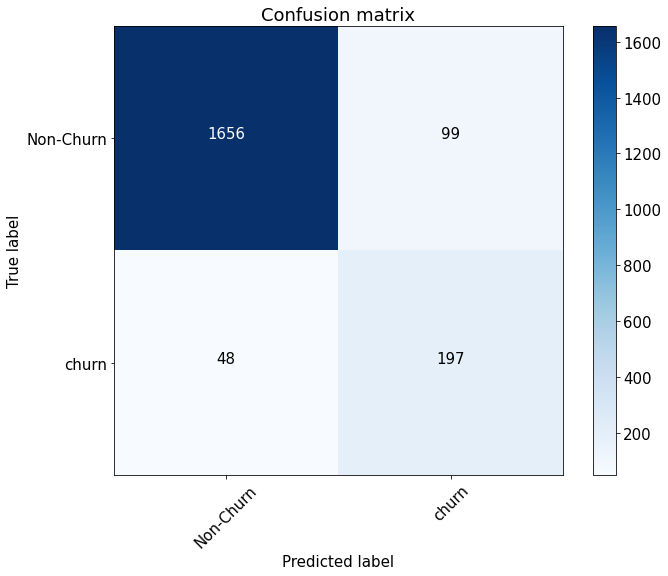

In [ ]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
roc_auc_score(y_test, preds)

0.9606581778010349

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# vectorizer.fit_transform(news)

In [ ]:
news['title']

0        Заместитель председателяnправительства РФnСерг...
1        Матч 1/16 финала Кубка России по футболу был п...
2        Форвард «Авангарда» Томаш Заборский прокоммент...
3        Главный тренер «Кубани» Юрий Красножан прокомм...
4        Решением попечительского совета владивостокско...
                               ...                        
26995    Ученые Токийского университета морских наук и ...
26996    Главой кафедры отечественной истории XX века и...
26997    Американские ученые уточнили возраст расположе...
26998    За последние 50 лет тропический углеродный цик...
26999    У живших примерно 7 тыс. лет назад на территор...
Name: title, Length: 27000, dtype: object

In [ ]:
vectorizer.fit_transform(news['title'])

<27000x381161 sparse matrix of type '<class 'numpy.float64'>'
	with 6872877 stored elements in Compressed Sparse Row format>

In [ ]:
w_idf = vectorizer.idf_
w_idf.shape


(381161,)

In [ ]:
 vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ちーはら', '仲良しぱくぱく', '黒人'], dtype=object)

Метрики для варианта mean: Best Threshold=0.218463, F-Score=0.653, Precision=0.568, Recall=0.767, rocauc = 0.9353264724693295


Метрики для median: Best Threshold=0.216642, F-Score=0.723, Precision=0.643, Recall=0.824, rocauc = 0.9565

Метрики для max: Best Threshold=0.282189, F-Score=0.731, Precision=0.667, Recall=0.808, rocauc = 0.9607